<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підготовка даних:

In [3]:
from google.colab import files

uploaded = files.upload()

Saving idle.csv to idle.csv
Saving running.csv to running.csv
Saving stairs.csv to stairs.csv
Saving walking.csv to walking.csv


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
df_idle = pd.read_csv('idle.csv')
df_running = pd.read_csv('running.csv')
df_stairs = pd.read_csv('stairs.csv')
df_walking = pd.read_csv('walking.csv')

In [53]:
df_idle

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195
...,...,...,...
62425,1.292869,6.641516,7.958327
62426,0.636858,6.311116,7.354988
62427,-0.402226,5.382166,8.810662
62428,-0.177171,4.692636,8.394072


In [54]:
df_running

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-4.151545,1.781286,2.173935
1,2.020706,3.706224,9.921572
2,1.762132,4.242526,8.078037
3,-0.445322,11.080365,6.756438
4,5.573702,13.436260,15.054740
...,...,...,...
102235,-1.905785,5.056554,5.774815
102236,6.071696,3.907337,7.287950
102237,6.694188,8.652645,21.294030
102238,-1.661576,7.225701,13.043611


In [55]:
df_stairs

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,6.727707,2.973599,3.936068
1,7.891289,0.440533,-3.342306
2,6.301539,-1.154005,0.067038
3,4.534618,-5.755661,-1.369483
4,4.563349,-3.730166,-0.028730
...,...,...,...
4945,1.417368,-17.482460,0.234632
4946,-4.769250,-9.591172,6.277597
4947,6.569690,3.016694,1.824382
4948,3.572149,1.891419,7.192182


In [56]:
df_walking

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,2.322376,3.643975,11.827356
1,1.781286,4.668694,6.148310
2,7.963115,-4.113238,1.359907
3,1.996764,-1.398214,1.163582
4,5.185841,-12.143391,4.687847
...,...,...,...
55495,4.529830,-12.488156,-0.378284
55496,6.871359,-11.037270,4.620809
55497,7.259220,-6.244078,1.355118
55498,6.143522,0.550666,11.391612


In [79]:
df_running['activity'] = 'running'
df_stairs['activity'] = 'stairs'
df_walking['activity'] = 'walking'
df_idle['activity'] = 'idle'

df_combined = pd.concat([df_running, df_stairs, df_walking, df_idle], ignore_index=True)


In [80]:
df_combined

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-4.151545,1.781286,2.173935,running
1,2.020706,3.706224,9.921572,running
2,1.762132,4.242526,8.078037,running
3,-0.445322,11.080365,6.756438,running
4,5.573702,13.436260,15.054740,running
...,...,...,...,...
225115,1.292869,6.641516,7.958327,idle
225116,0.636858,6.311116,7.354988,idle
225117,-0.402226,5.382166,8.810662,idle
225118,-0.177171,4.692636,8.394072,idle


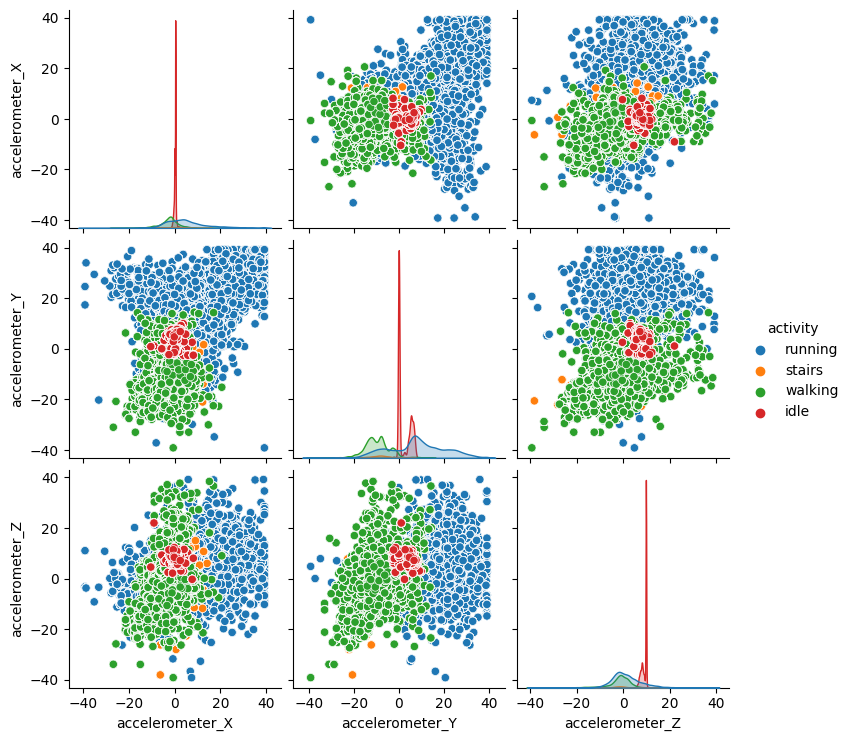

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_combined, hue='activity')
plt.show()

# Розрахунок часових ознак (mean, std, median) для кожної активності:

In [59]:
df_combined['mean'] = df_combined[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].mean(axis=1)
df_combined['std_dev'] = df_combined[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].std(axis=1)
df_combined['median'] = df_combined[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']].median(axis=1)

df_combined

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity,mean,std_dev,median
0,-4.151545,1.781286,2.173935,running,-0.065441,3.544111,1.781286
1,2.020706,3.706224,9.921572,running,5.216167,4.161234,3.706224
2,1.762132,4.242526,8.078037,running,4.694232,3.182089,4.242526
3,-0.445322,11.080365,6.756438,running,5.797160,5.822416,6.756438
4,5.573702,13.436260,15.054740,running,11.354901,5.071643,13.436260
...,...,...,...,...,...,...,...
225115,1.292869,6.641516,7.958327,idle,5.297571,3.530117,6.641516
225116,0.636858,6.311116,7.354988,idle,4.767654,3.615249,6.311116
225117,-0.402226,5.382166,8.810662,idle,4.596867,4.656377,5.382166
225118,-0.177171,4.692636,8.394072,idle,4.303179,4.298873,4.692636


# Розділити датасет на навчальний та тестовий набори:

In [75]:
X = df_combined[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'mean', 'std_dev', 'median']] # 'mean', 'std_dev', 'median'
y = df_combined['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Розміри навчального набору:", X_train.shape, y_train.shape)
print("Розміри тестового набору:", X_test.shape, y_test.shape)

Розміри навчального набору: (168840, 6) (168840,)
Розміри тестового набору: (56280, 6) (56280,)


# Навчання:

In [73]:
import time

def timing(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Час виконання {func.__name__}: {execution_time} секунд")
        return result
    return wrapper

In [76]:
@timing
def train_and_predict_svm(X_train, y_train, X_test, y_test):
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, svm_predictions)
    return accuracy

@timing
def train_and_predict_rf(X_train, y_train, X_test, y_test):
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, rf_predictions)
    return accuracy

svm_accuracy = train_and_predict_svm(X_train, y_train, X_test, y_test)
rf_accuracy = train_and_predict_rf(X_train, y_train, X_test, y_test)

print(f"Точність SVM: {svm_accuracy}")
print(f"Точність RandomForest: {rf_accuracy}")

Час виконання train_and_predict_svm: 530.661230802536 секунд
Час виконання train_and_predict_rf: 28.287856578826904 секунд
Точність SVM: 0.9060234541577825
Точність RandomForest: 0.9996090973702914


# ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']:

Час виконання train_and_predict_svm: 457.638560295105 секунд

Час виконання train_and_predict_rf: 18.09494400024414 секунд

Точність SVM: 0.9053482587064676

Точність RandomForest: 0.9996090973702914


# ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'mean']:

Час виконання train_and_predict_svm: 482.026695728302 секунд

Час виконання train_and_predict_rf: 29.511366367340088 секунд

Точність SVM: 0.9060589907604834

Точність RandomForest: 0.9996090973702914

# ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'mean', 'std_dev', 'median']:

Час виконання train_and_predict_svm: 530.661230802536 секунд

Час виконання train_and_predict_rf: 28.287856578826904 секунд

Точність SVM: 0.9060234541577825

Точність RandomForest: 0.9996090973702914

# ['mean']:

Час виконання train_and_predict_svm: 1102.6397948265076 секунд

Час виконання train_and_predict_rf: 29.877565145492554 секунд

Точність SVM: 0.7789445628997868

Точність RandomForest: 0.9327114427860697

# ['mean', 'std_dev']:

Час виконання train_and_predict_svm: 817.297737121582 секунд

Час виконання train_and_predict_rf: 23.12571120262146 секунд

Точність SVM: 0.8327647476901209

Точність RandomForest: 0.9995380241648898


# ['mean', 'std_dev', 'median']:

Час виконання train_and_predict_svm: 945.1702845096588 секунд

Час виконання train_and_predict_rf: 21.556085348129272 секунд

Точність SVM: 0.8507640369580668

Точність RandomForest: 0.999591329068941

# Висновки:

Видно, що модель RandomForest демонструє високу точність незалежно від того, які ознаки використовуються. Точність моделі SVM також є високою, але вона може залежати від обраного набору ознак. Використання часових ознак  приводить до трошки меншої точності, ніж тільки використання основних значень акселерометра.